# **Pakistan's largest E-commerce Dataset**
### **Complete Exploratory Data Analysis**


## Author : **Usman Majeed**
#### *contact* : fa23-bds-042@isbstudent.comsats.edu.pk

## About Dataset

>- **`Description`**\
> The Data Set was downloaded from Kaggle, from the following [link](https://www.kaggle.com/datasets/zusmani/pakistans-largest-ecommerce-dataset/discussion/215411 )

- This is the largest retail e-commerce orders dataset from Pakistan. It contains half a million transaction records from March 2016 to August 2018. The data was collected from various e-commerce merchants as part of a research study.

- There is a dire need for such dataset to learn about Pakistan’s emerging e-commerce potential and I hope this will help many startups in many ways.

- The dataset contains detailed information of half a million e-commerce orders in Pakistan from March 2016 to August 2018. It contains item details, shipping method, payment method like credit card, Easy-Paisa, Jazz-Cash, cash-on-delivery, product categories like fashion, mobile, electronics, appliance etc., date of order, SKU, price, quantity, total and customer ID. This is the most detailed dataset about e-commerce in Pakistan that you can find in the Public domain.

## **1. Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#this is for jupyter notebook to show the plot in the notebook itself instead of opening a new window for the plot
%matplotlib inline 

## 2. **Data Loading and exploration and cleaning**
 ↪ Load the csv file with the pandas
 
 ↪ creating the dataframe and understanding the data present in the dataset using pandas
 
 ↪ Dealing with the missing data, outliers and the incorrect records

In [2]:
df = pd.read_csv("e-commerce_dataSet.csv")


C:\Users\u4usm\AppData\Local\Temp\ipykernel_22684\115880053.py:1: DtypeWarning: Columns (1,2,3,7,8,9,11,12,13,14,17,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("e-commerce_dataSet.csv")


### **- Viewing the first five Rows of the data**

In [3]:
df.head(5)

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,...,Month,Customer Since,M-Y,FY,Customer ID,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,211131.0,complete,7/1/2016,kreations_YI 06-L,1950.0,1.0,1950.0,100147443,Women's Fashion,\N,...,7.0,2016-7,7-2016,FY17,1.0,NaN,NaN,NaN,NaN,NaN
1,211133.0,canceled,7/1/2016,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...,240.0,1.0,240.0,100147444,Beauty & Grooming,\N,...,7.0,2016-7,7-2016,FY17,2.0,NaN,NaN,NaN,NaN,NaN
2,211134.0,canceled,7/1/2016,Ego_UP0017-999-MR0,2450.0,1.0,2450.0,100147445,Women's Fashion,\N,...,7.0,2016-7,7-2016,FY17,3.0,NaN,NaN,NaN,NaN,NaN
3,211135.0,complete,7/1/2016,kcc_krone deal,360.0,1.0,60.0,100147446,Beauty & Grooming,R-FSD-52352,...,7.0,2016-7,7-2016,FY17,4.0,NaN,NaN,NaN,NaN,NaN
4,211136.0,order_refunded,7/1/2016,BK7010400AG,555.0,2.0,1110.0,100147447,Soghaat,\N,...,7.0,2016-7,7-2016,FY17,5.0,NaN,NaN,NaN,NaN,NaN


> **Note**: Some the output of notebook does not present the complete output, therefore we can increase the limit of columns view and row view by using these commands: 

In [4]:
pd.set_option('display.max_columns', None) # this is to display all the columns in the dataframe
pd.set_option('display.max_rows', None) # this is to display all the rows in the dataframe

- ### **It's time to hide any un-necessary warnings during runtime.**

In [5]:
# hide all warnings runtime
import warnings
warnings.filterwarnings('ignore')

### *- let's see the exact column names which can be easily copied later on from the dataset.*

In [6]:
df.columns

Index(['item_id', 'status', 'created_at', 'sku', 'price', 'qty_ordered',
       'grand_total', 'increment_id', 'category_name_1',
       'sales_commission_code', 'discount_amount', 'payment_method',
       'Working Date', 'BI Status', ' MV ', 'Year', 'Month', 'Customer Since',
       'M-Y', 'FY', 'Customer ID', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25'],
      dtype='object')

### **- Let's look at the shape of the dataset.**

In [7]:
df.shape

(1048575, 26)

- ### **Not enough, let's have a look on the columns and their data types using detailed info function**

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 26 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   item_id                584524 non-null  float64
 1   status                 584509 non-null  object 
 2   created_at             584524 non-null  object 
 3   sku                    584504 non-null  object 
 4   price                  584524 non-null  float64
 5   qty_ordered            584524 non-null  float64
 6   grand_total            584524 non-null  float64
 7   increment_id           584524 non-null  object 
 8   category_name_1        584360 non-null  object 
 9   sales_commission_code  447346 non-null  object 
 10  discount_amount        584524 non-null  float64
 11  payment_method         584524 non-null  object 
 12  Working Date           584524 non-null  object 
 13  BI Status              584524 non-null  object 
 14   MV                    584524 non-

# **2.1 Observations**
---
1. There are 1048575 rows and 25 columns in the dataset
2. The columns are of different data types
3. The columns in the datasets are:
   - `'item_id', 'status', 'created_at', 'sku', 'price', 'qty_ordered',
       'grand_total', 'increment_id', 'category_name_1',
       'sales_commission_code', 'discount_amount', 'payment_method',
       'Working Date', 'BI Status', ' MV ', 'Year', 'Month', 'Customer Since',
       'M-Y', 'FY', 'Customer ID', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25'`
4. There are some missing values in the dataset which we will read in details and deal later on in the notebook.
5. There are some columns which are of object data type but they should be of numeric data type, we will convert them later on in the notebook.
   

### **Let's specifically look at the information of the numerical columns.**

In [9]:
df.describe()

,item_id,price,qty_ordered,grand_total,discount_amount,Year,Month,Customer ID,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
count,584524.000000,5.845240e+05,584524.000000,5.845240e+05,584524.000000,584524.000000,584524.000000,584513.000000,0.0,0.0,0.0,0.0,0.0
mean,565667.074218,6.348748e+03,1.296388,8.530619e+03,499.492775,2017.044115,7.167654,45790.511965,NaN,NaN,NaN,NaN,NaN
std,200121.173648,1.494927e+04,3.996061,6.132081e+04,1506.943046,0.707355,3.486305,34414.962389,NaN,NaN,NaN,NaN,NaN
min,211131.000000,0.000000e+00,1.000000,-1.594000e+03,-599.500000,2016.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN
25%,395000.750000,3.600000e+02,1.000000,9.450000e+02,0.000000,2017.000000,4.000000,13516.000000,NaN,NaN,NaN,NaN,NaN
50%,568424.500000,8.990000e+02,1.000000,1.960400e+03,0.000000,2017.000000,7.000000,42856.000000,NaN,NaN,NaN,NaN,NaN
75%,739106.250000,4.070000e+03,1.000000,6.999000e+03,160.500000,2018.000000,11.000000,73536.000000,NaN,NaN,NaN,NaN,NaN
max,905208.000000,1.012626e+06,1000.000000,1.788800e+07,90300.000000,2018.000000,12.000000,115326.000000,NaN,NaN,NaN,NaN,NaN


## **2.2 Observations**
---
- We have 8 columns as numeric data type, rest all are object data type (according to python), but we will see for any anomalies regarding their datatypes as we must convert them to numeric data type in data wrangling process.
---

In [10]:
df.head()

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,discount_amount,payment_method,Working Date,BI Status,MV,Year,Month,Customer Since,M-Y,FY,Customer ID,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,211131.0,complete,7/1/2016,kreations_YI 06-L,1950.0,1.0,1950.0,100147443,Women's Fashion,\N,0.0,cod,7/1/2016,#REF!,"1,950",2016.0,7.0,2016-7,7-2016,FY17,1.0,NaN,NaN,NaN,NaN,NaN
1,211133.0,canceled,7/1/2016,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...,240.0,1.0,240.0,100147444,Beauty & Grooming,\N,0.0,cod,7/1/2016,Gross,240,2016.0,7.0,2016-7,7-2016,FY17,2.0,NaN,NaN,NaN,NaN,NaN
2,211134.0,canceled,7/1/2016,Ego_UP0017-999-MR0,2450.0,1.0,2450.0,100147445,Women's Fashion,\N,0.0,cod,7/1/2016,Gross,"2,450",2016.0,7.0,2016-7,7-2016,FY17,3.0,NaN,NaN,NaN,NaN,NaN
3,211135.0,complete,7/1/2016,kcc_krone deal,360.0,1.0,60.0,100147446,Beauty & Grooming,R-FSD-52352,300.0,cod,7/1/2016,Net,360,2016.0,7.0,2016-7,7-2016,FY17,4.0,NaN,NaN,NaN,NaN,NaN
4,211136.0,order_refunded,7/1/2016,BK7010400AG,555.0,2.0,1110.0,100147447,Soghaat,\N,0.0,cod,7/1/2016,Valid,"1,110",2016.0,7.0,2016-7,7-2016,FY17,5.0,NaN,NaN,NaN,NaN,NaN


## **2.3 Observations**:
---
- As we can clearly see that are many columns that only have null values in them and they are serving no purpose.
---

### **- Let's get rid of these columns.**

- #### First we will declare a list in whoch we pass the names of such columns.

In [11]:
columns_to_drop = ["Unnamed: 21" , "Unnamed: 22" ,"Unnamed: 23" , "Unnamed: 24" ,"Unnamed: 25"]

# And now we will Drop these columns and update the dataset.
df.drop(columns=columns_to_drop, inplace=True)

In [12]:
df.describe()

,item_id,price,qty_ordered,grand_total,discount_amount,Year,Month,Customer ID
count,584524.000000,5.845240e+05,584524.000000,5.845240e+05,584524.000000,584524.000000,584524.000000,584513.000000
mean,565667.074218,6.348748e+03,1.296388,8.530619e+03,499.492775,2017.044115,7.167654,45790.511965
std,200121.173648,1.494927e+04,3.996061,6.132081e+04,1506.943046,0.707355,3.486305,34414.962389
min,211131.000000,0.000000e+00,1.000000,-1.594000e+03,-599.500000,2016.000000,1.000000,1.000000
25%,395000.750000,3.600000e+02,1.000000,9.450000e+02,0.000000,2017.000000,4.000000,13516.000000
50%,568424.500000,8.990000e+02,1.000000,1.960400e+03,0.000000,2017.000000,7.000000,42856.000000
75%,739106.250000,4.070000e+03,1.000000,6.999000e+03,160.500000,2018.000000,11.000000,73536.000000
max,905208.000000,1.012626e+06,1000.000000,1.788800e+07,90300.000000,2018.000000,12.000000,115326.000000


## **2.4 Observations**:
---
- We have succesfully removed the columns that only had the null values in them.
---

In [13]:
df.describe()

,item_id,price,qty_ordered,grand_total,discount_amount,Year,Month,Customer ID
count,584524.000000,5.845240e+05,584524.000000,5.845240e+05,584524.000000,584524.000000,584524.000000,584513.000000
mean,565667.074218,6.348748e+03,1.296388,8.530619e+03,499.492775,2017.044115,7.167654,45790.511965
std,200121.173648,1.494927e+04,3.996061,6.132081e+04,1506.943046,0.707355,3.486305,34414.962389
min,211131.000000,0.000000e+00,1.000000,-1.594000e+03,-599.500000,2016.000000,1.000000,1.000000
25%,395000.750000,3.600000e+02,1.000000,9.450000e+02,0.000000,2017.000000,4.000000,13516.000000
50%,568424.500000,8.990000e+02,1.000000,1.960400e+03,0.000000,2017.000000,7.000000,42856.000000
75%,739106.250000,4.070000e+03,1.000000,6.999000e+03,160.500000,2018.000000,11.000000,73536.000000
max,905208.000000,1.012626e+06,1000.000000,1.788800e+07,90300.000000,2018.000000,12.000000,115326.000000


## **2.6 Observations**:
---
- Now we have 8 columns of the numeric datatype.
- In the `item_id` column the maximum value is `905208` and minimum is `211131` also the mean value is `565667`.
- We can see that the `price` column has a minimum value of `0` and a maximum value of `5845240` and mean value is `6348748`.
- Similarly, we can observe the other columns as well.

- Therefore, it is important to classify apps based on the correlation matrix and observe the descriptive status of the respective columns.

But before that we have to cope up with the missing values.

---


## **2.7 Dealing with the Missing Values**
- Dealing with the missing values is the most important part of the data wrangling process, In order to get the correct insights of the data, missing valeus must be addressed.

- Let's have a look on the missing values in the dataset

- This function will show the all the count of null values in each column.

In [14]:
df.isnull().sum() 

item_id                  464051
status                   464066
created_at               464051
sku                      464071
price                    464051
qty_ordered              464051
grand_total              464051
increment_id             464051
category_name_1          464215
sales_commission_code    601229
discount_amount          464051
payment_method           464051
Working Date             464051
BI Status                464051
 MV                      464051
Year                     464051
Month                    464051
Customer Since           464062
M-Y                      464051
FY                       464051
Customer ID              464062
dtype: int64

- ### **Let's have a look at the heirarchy of the null values.**


In [15]:
df.isnull().sum().sort_values(ascending=False)

sales_commission_code    601229
category_name_1          464215
sku                      464071
status                   464066
Customer ID              464062
Customer Since           464062
BI Status                464051
FY                       464051
M-Y                      464051
Month                    464051
Year                     464051
 MV                      464051
item_id                  464051
Working Date             464051
payment_method           464051
increment_id             464051
grand_total              464051
qty_ordered              464051
price                    464051
created_at               464051
discount_amount          464051
dtype: int64

- ### **Let's get the total number of the null values in the dataFrame** 

In [16]:
print(f"The total number of null values in the dataFrame are : {df.isnull().sum().sum()}")

The total number of null values in the dataFrame are : 9882470


- ### **Now to check the percentage of the null values in the columns.**


In [17]:
((df.isnull().sum() / len(df) * 100) ).sort_values(ascending = False)

sales_commission_code    57.337720
category_name_1          44.271034
sku                      44.257302
status                   44.256825
Customer ID              44.256443
Customer Since           44.256443
BI Status                44.255394
FY                       44.255394
M-Y                      44.255394
Month                    44.255394
Year                     44.255394
 MV                      44.255394
item_id                  44.255394
Working Date             44.255394
payment_method           44.255394
increment_id             44.255394
grand_total              44.255394
qty_ordered              44.255394
price                    44.255394
created_at               44.255394
discount_amount          44.255394
dtype: float64

- ### **Let's plot the heatmap of the missing values in the dataset.**

<Axes: >

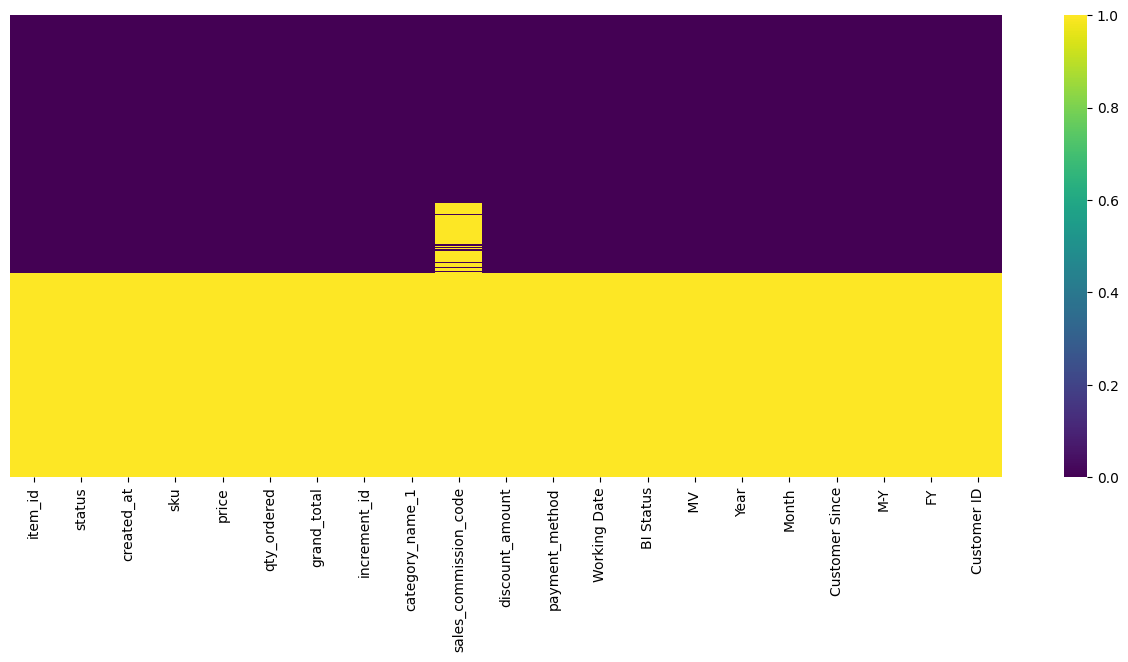

In [18]:
# This expression will create a canvas for our graph plotting...

plt.figure(figsize = (16,6))

# THis expression will plot the missing values in the dataset using the heatmap.

sns.heatmap(data = df.isnull() , yticklabels = False , cbar = True , cmap = 'viridis' )



- ### **Let's plot the null values using the bar plot.**

Text(0.5, 1.0, 'Percentageof NULL values in dataFrame.')

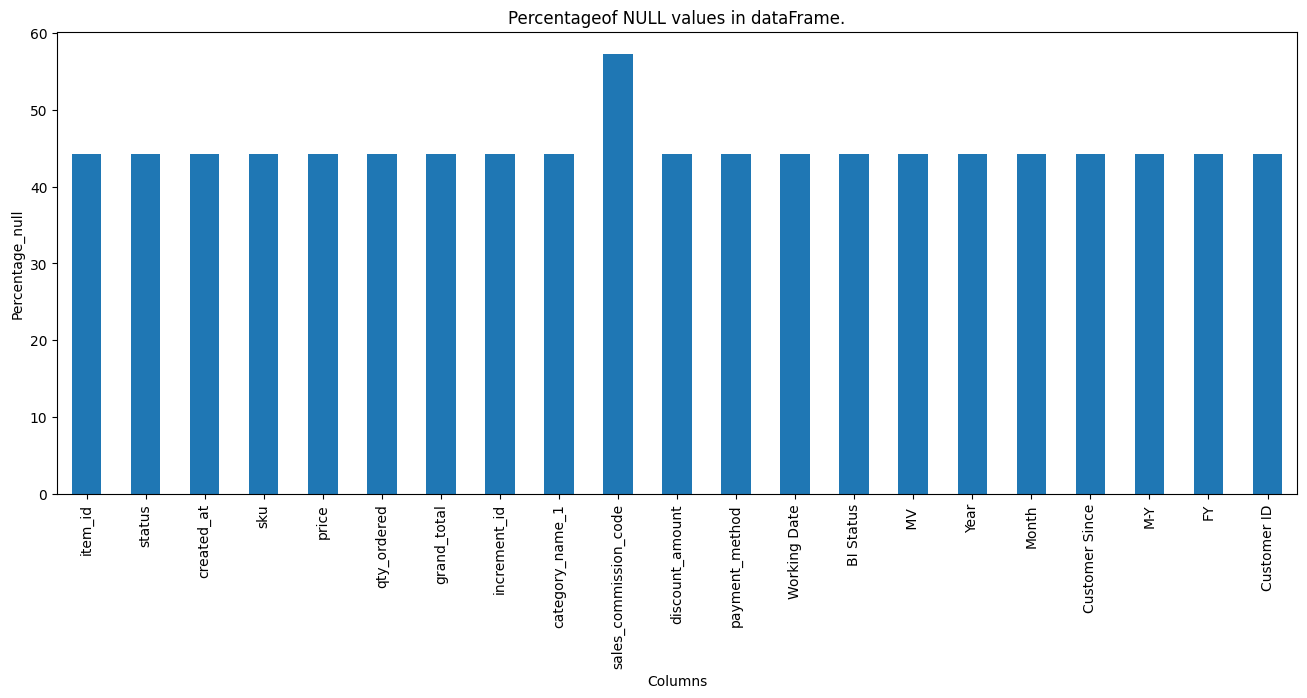

In [19]:
# make the figure size.
plt.figure(figsize = (16 , 6))

# Let's count the percentage of null values in the dataFrame.

percentage_null = df.isnull().sum() / len(df) * 100
percentage_null.plot(kind = 'bar')

# NOw we have to add the labels.

plt.xlabel("Columns")
plt.ylabel("Percentage_null")
plt.title("Percentageof NULL values in dataFrame.")


In [20]:
missing_percentage = df.isnull().sum() / len(df) * 100 
print(missing_percentage)

item_id                  44.255394
status                   44.256825
created_at               44.255394
sku                      44.257302
price                    44.255394
qty_ordered              44.255394
grand_total              44.255394
increment_id             44.255394
category_name_1          44.271034
sales_commission_code    57.337720
discount_amount          44.255394
payment_method           44.255394
Working Date             44.255394
BI Status                44.255394
 MV                      44.255394
Year                     44.255394
Month                    44.255394
Customer Since           44.256443
M-Y                      44.255394
FY                       44.255394
Customer ID              44.256443
dtype: float64


## **2.8 Observations**
---

- In the `20` columns of the dataset, they have `464051` missing values which makes upto the percentage of `44.25`.
- THe `sales_commission_code` column has the `601229` missing values which makes upto the `57.34` percent of the missing values.
- Rest of the columns share same attributes regarding the null or missing values. 

 ### **Dealing with the missing values**
- We can not impute the missing values in the column by simply dropping them. As they maybe directly linked with the other columns. To test this Hypothesis we need to plot the columns and statistically test it using `pearson correlation test`.
---

- Let's run the correlations

- ### *This will tell us about the numberic columns in the dataFrame.*

In [21]:
df.describe() 

,item_id,price,qty_ordered,grand_total,discount_amount,Year,Month,Customer ID
count,584524.000000,5.845240e+05,584524.000000,5.845240e+05,584524.000000,584524.000000,584524.000000,584513.000000
mean,565667.074218,6.348748e+03,1.296388,8.530619e+03,499.492775,2017.044115,7.167654,45790.511965
std,200121.173648,1.494927e+04,3.996061,6.132081e+04,1506.943046,0.707355,3.486305,34414.962389
min,211131.000000,0.000000e+00,1.000000,-1.594000e+03,-599.500000,2016.000000,1.000000,1.000000
25%,395000.750000,3.600000e+02,1.000000,9.450000e+02,0.000000,2017.000000,4.000000,13516.000000
50%,568424.500000,8.990000e+02,1.000000,1.960400e+03,0.000000,2017.000000,7.000000,42856.000000
75%,739106.250000,4.070000e+03,1.000000,6.999000e+03,160.500000,2018.000000,11.000000,73536.000000
max,905208.000000,1.012626e+06,1000.000000,1.788800e+07,90300.000000,2018.000000,12.000000,115326.000000


<Axes: >

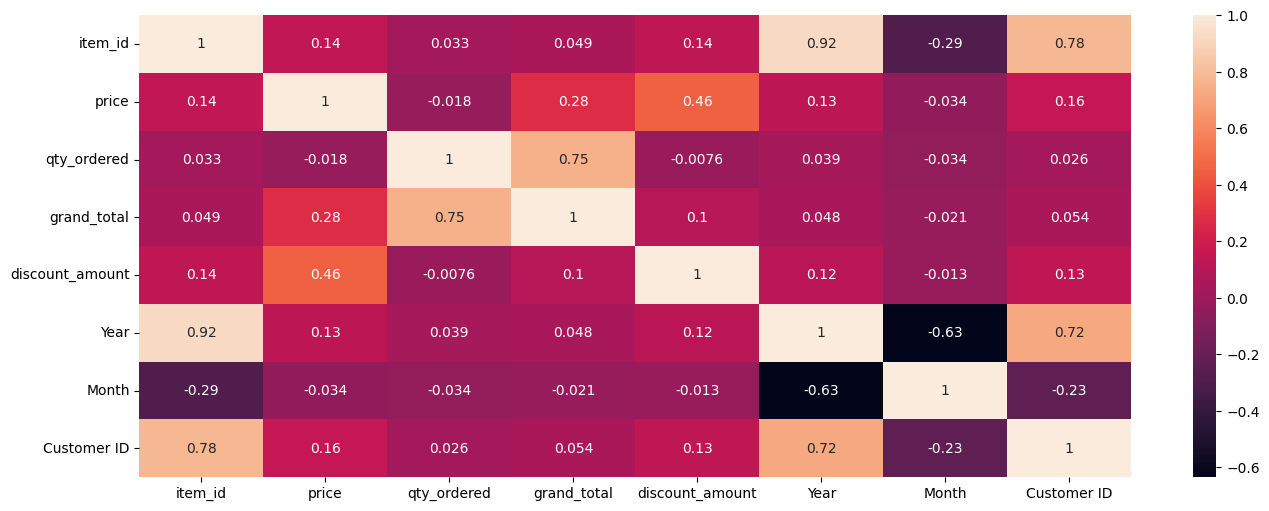

In [22]:
plt.figure(figsize= (16 , 6) )

# Create a list of all the numberic columns.

numeric_cols = ['item_id' ,'price' ,'qty_ordered' ,'grand_total' ,'discount_amount' ,'Year',	'Month', 'Customer ID']

# Passing the data into the columns from the dataFrame
# numeric_cols = df[numeric_cols]

# Let's plor the correlation
sns.heatmap(df[numeric_cols].corr(), annot= True)


- ### **Let's calculate the correlation matrix of these columns.** 

In [23]:
df[numeric_cols].corr()

,item_id,price,qty_ordered,grand_total,discount_amount,Year,Month,Customer ID
item_id,1.000000,0.141596,0.033381,0.049265,0.136515,0.920564,-0.292860,0.780030
price,0.141596,1.000000,-0.017629,0.277607,0.455578,0.129052,-0.034473,0.156808
qty_ordered,0.033381,-0.017629,1.000000,0.753487,-0.007621,0.039236,-0.033652,0.025671
grand_total,0.049265,0.277607,0.753487,1.000000,0.104825,0.048432,-0.020887,0.054043
discount_amount,0.136515,0.455578,-0.007621,0.104825,1.000000,0.116063,-0.013386,0.134847
Year,0.920564,0.129052,0.039236,0.048432,0.116063,1.000000,-0.634711,0.717476
Month,-0.292860,-0.034473,-0.033652,-0.020887,-0.013386,-0.634711,1.000000,-0.231808
Customer ID,0.780030,0.156808,0.025671,0.054043,0.134847,0.717476,-0.231808,1.000000


In [24]:
# we can calculate the pearson correlation coefficient using scipy as well as follows

from scipy import stats

# # remove rows containing NaN or infinite values (Important to calculate Pearson's R)
df_clean = df.dropna()

# # calculate Pearson's R 
pearson_r, _ = stats.pearsonr(df_clean['discount_amount'], df_clean['qty_ordered'])
print(f"Pearson's R between qty_ordered and discount is : {pearson_r:.4f}")

Pearson's R between qty_ordered and discount is : -0.0022


---
## **2.9 Observations**
- Lighter color shows the high correlation and darker color shows the low correlation
- We can see that the `discount_amount` column has a high correlation with the `price` column, which is `0.45` according to corr(). Which is quite good.
  - This shows that the more the discounted price the more the net price increases. If in any case we need to impute any column values we will impute the price.
    - If we have an `discounted price` and we impute the price with same value or via average price then it will be wrong.
- Discounted price is slightly correlated with `grand_total` , which is `0.10`, this also shows us the importance of price and discounted price. But we can not depend on it as the Peason correlation is very low.
   
---

- ### **Now it's time to remove the duplicate values from the DataFrame** 

- *First we will count the number of duplicate values in the dataframe.*

In [25]:
print(f"The number of duplicated rows in the dataFrame are : {df.duplicated().sum()}")

The number of duplicated rows in the dataFrame are : 464050


- ### **Wo-hoo let's drop 'em** 

In [26]:
df = df.drop_duplicates()

#### *Let's check whether the duplicate values have successfully dropped or not ?*

In [27]:
print(f"The number of duplicated rows in the dataFrame are : {df.duplicated().sum()}")

The number of duplicated rows in the dataFrame are : 0


In [28]:
print(f"The length of the updated dataSet is : {len(df)}")

The length of the updated dataSet is : 584525


- ### **Let's see how the null value numbers are affected by dropping duplicates.**

In [29]:
df.isnull().sum()

item_id                       1
status                       16
created_at                    1
sku                          21
price                         1
qty_ordered                   1
grand_total                   1
increment_id                  1
category_name_1             165
sales_commission_code    137179
discount_amount               1
payment_method                1
Working Date                  1
BI Status                     1
 MV                           1
Year                          1
Month                         1
Customer Since               12
M-Y                           1
FY                            1
Customer ID                  12
dtype: int64

- ### **Let's visulaize the null values in the form of heatmap using missingno library.**

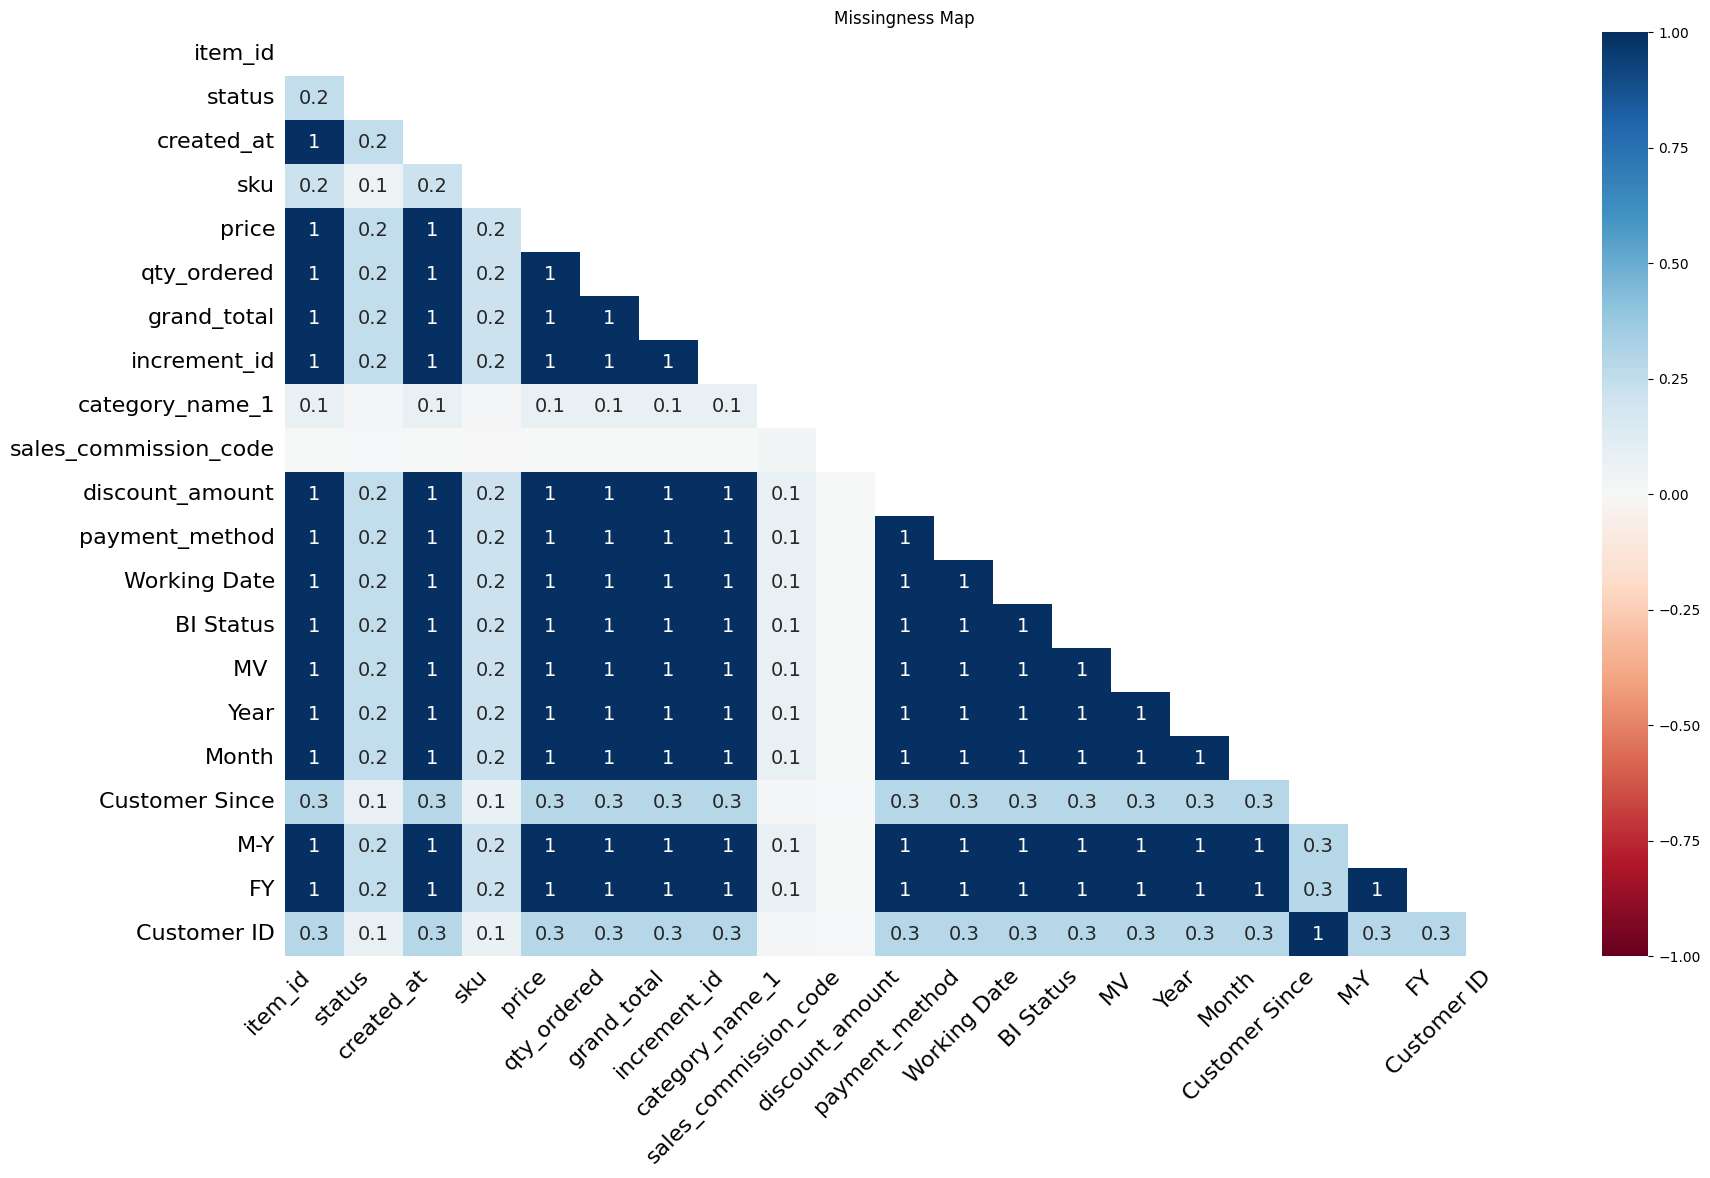

In [30]:
import missingno as msno
# Create a missingness map
msno.heatmap(df)
plt.title('Missingness Map')
plt.show()

---
## **2.10 Observations**
- First, we checked whether there are any duplicate values in the dataFrame or not.
- There were `464050` duplicated rows in the dataset. 
    - We removed the duplicated rows by dropping from the dataSet.
        - Now there aren't any duplicated rows in the dataSet.
- Before removal, null values in the columns were ranging from `464215` to `601229`.
  - After removal the the null values in the columns are ranging from `1` to `137179`.

---
- Now, we can clearly see that by dropping the duplicates we have seriously changed the composition of the data. 
  - The length of the dataSet has changed from `1048575` to `584525`.

- ### **Now, it's time to drop the null values from the dataset.** 

In [31]:
df = df.dropna()

- #### *Let's check whether we have succesfully dropped the null values or not ?*

In [32]:
df.isnull().sum()

item_id                  0
status                   0
created_at               0
sku                      0
price                    0
qty_ordered              0
grand_total              0
increment_id             0
category_name_1          0
sales_commission_code    0
discount_amount          0
payment_method           0
Working Date             0
BI Status                0
 MV                      0
Year                     0
Month                    0
Customer Since           0
M-Y                      0
FY                       0
Customer ID              0
dtype: int64

- ### **Great, we have successsfully removed the null values from the dataSet.**

In [33]:
df.head()

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,discount_amount,payment_method,Working Date,BI Status,MV,Year,Month,Customer Since,M-Y,FY,Customer ID
0,211131.0,complete,7/1/2016,kreations_YI 06-L,1950.0,1.0,1950.0,100147443,Women's Fashion,\N,0.0,cod,7/1/2016,#REF!,"1,950",2016.0,7.0,2016-7,7-2016,FY17,1.0
1,211133.0,canceled,7/1/2016,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...,240.0,1.0,240.0,100147444,Beauty & Grooming,\N,0.0,cod,7/1/2016,Gross,240,2016.0,7.0,2016-7,7-2016,FY17,2.0
2,211134.0,canceled,7/1/2016,Ego_UP0017-999-MR0,2450.0,1.0,2450.0,100147445,Women's Fashion,\N,0.0,cod,7/1/2016,Gross,"2,450",2016.0,7.0,2016-7,7-2016,FY17,3.0
3,211135.0,complete,7/1/2016,kcc_krone deal,360.0,1.0,60.0,100147446,Beauty & Grooming,R-FSD-52352,300.0,cod,7/1/2016,Net,360,2016.0,7.0,2016-7,7-2016,FY17,4.0
4,211136.0,order_refunded,7/1/2016,BK7010400AG,555.0,2.0,1110.0,100147447,Soghaat,\N,0.0,cod,7/1/2016,Valid,"1,110",2016.0,7.0,2016-7,7-2016,FY17,5.0


---
- ### **Now as we are sone at wrangling the data, let's create some attractie visulas to find out any hidden patterns or to plo the trends that maybe present in the dataset.**
---

#                                   **3.0 DATA VISUALIZATION**
---

# **3.1 What is the trend sales over span of months ?**

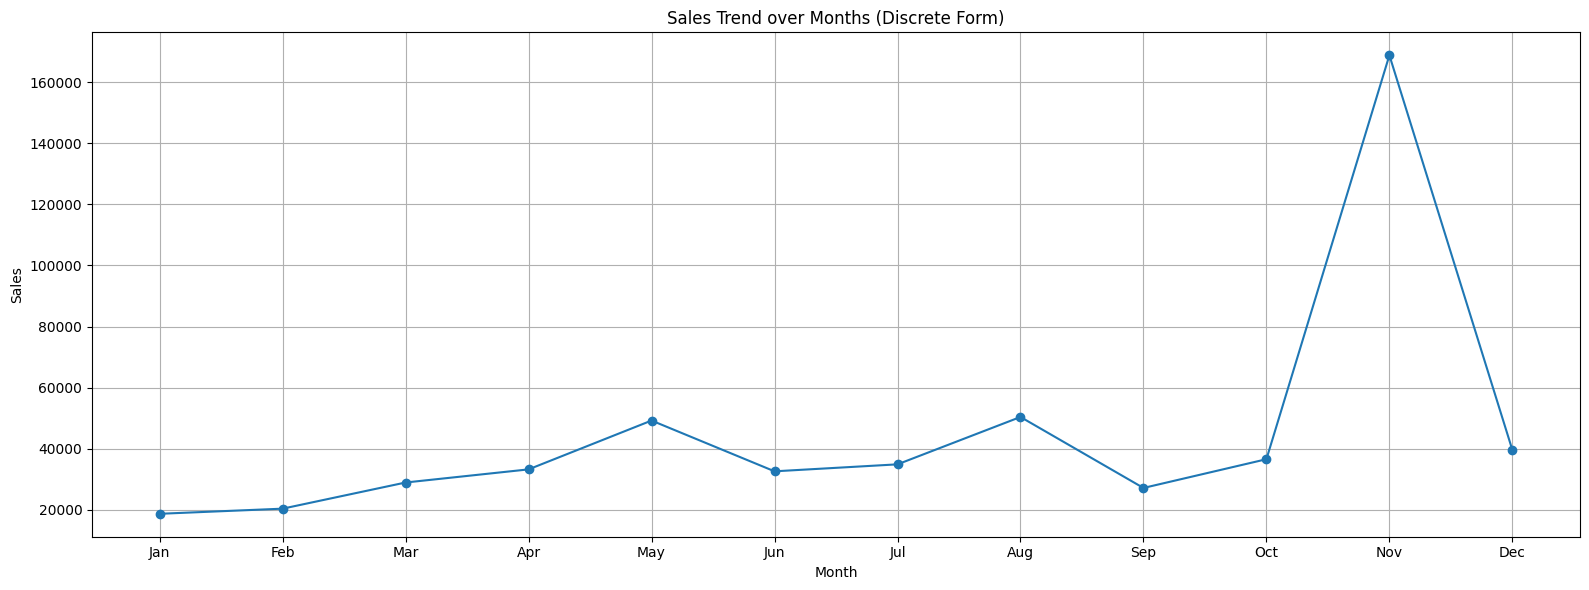

In [34]:
# Group by month and sum the sales for each month
monthly_sales = df.groupby('Month')['qty_ordered'].sum()

# Plot the line graph of sales for each month
plt.figure(figsize=(16, 6))  # Set the figure size
monthly_sales.plot(marker='o', linestyle='-')  # Plot the line graph
plt.title('Sales Trend over Months (Discrete Form)')  # Add title to the plot
plt.xlabel('Month')  # Add label to x-axis
plt.ylabel('Sales')  # Add label to y-axis
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])  # Set x-axis ticks
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.grid(True)  # Add grid
plt.show()  # Show the

# **3.2 What is the percentage of orders placed over the given years?**

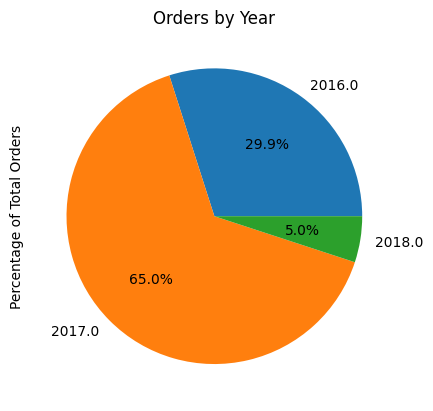

In [35]:
# Groupby month and count orders
monthly_counts = df.groupby('Year')['item_id'].count()

# Plot pie chart  
plt.pie(monthly_counts, labels=monthly_counts.index, autopct='%1.1f%%')

# Add title and labels
plt.title('Orders by Year')  
plt.ylabel('Percentage of Total Orders')

plt.show()

# **3.3 What is the distribution of new, old and repeated customers?**

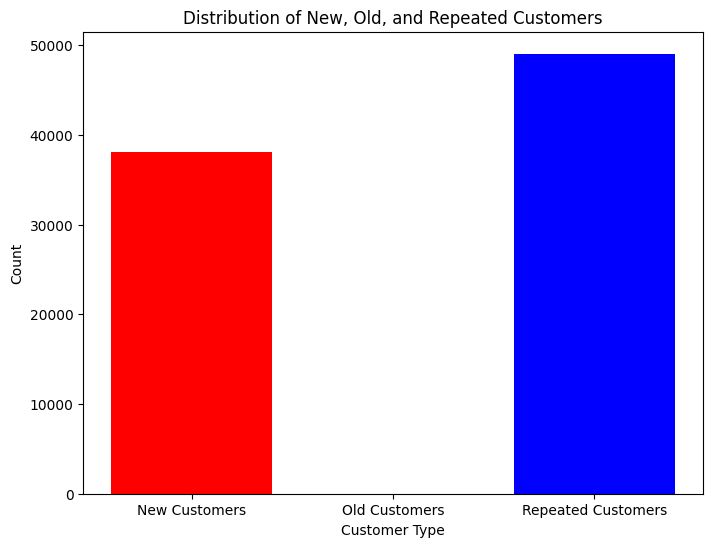

In [36]:
# Count the number of purchases made by each customer
customer_purchases = df['Customer ID'].value_counts()

# Define criteria for categorizing customers
new_customers = customer_purchases[customer_purchases == 1].count()
repeated_customers = customer_purchases[customer_purchases > 1].count()
old_customers = len(df['Customer ID'].unique()) - new_customers - repeated_customers

# Plot the bar plot with red and blue colors
plt.figure(figsize=(8, 6))
plt.bar(['New Customers', 'Old Customers', 'Repeated Customers'], [new_customers, old_customers, repeated_customers], color=['red', 'blue', 'blue'])
plt.title('Distribution of New, Old, and Repeated Customers')
plt.xlabel('Customer Type')
plt.ylabel('Count')
plt.show()

# **3.4 What is the distribution of orders placed in an year with respect to each month ?**

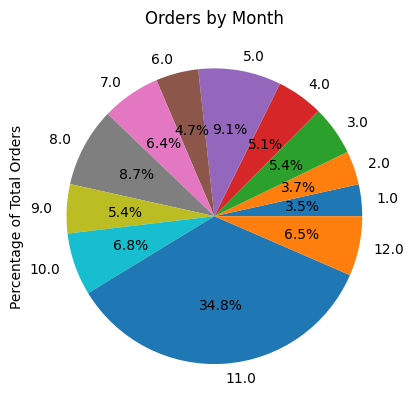

In [37]:
# Groupby month and count orders
monthly_counts = df.groupby('Month')['item_id'].count()

# Plot pie chart  
plt.pie(monthly_counts, labels=monthly_counts.index, autopct='%1.1f%%')

# Add title and labels
plt.title('Orders by Month')  
plt.ylabel('Percentage of Total Orders')

plt.show()

# **3.5 Let's plot a contingency table between the Order month and Item Category.**

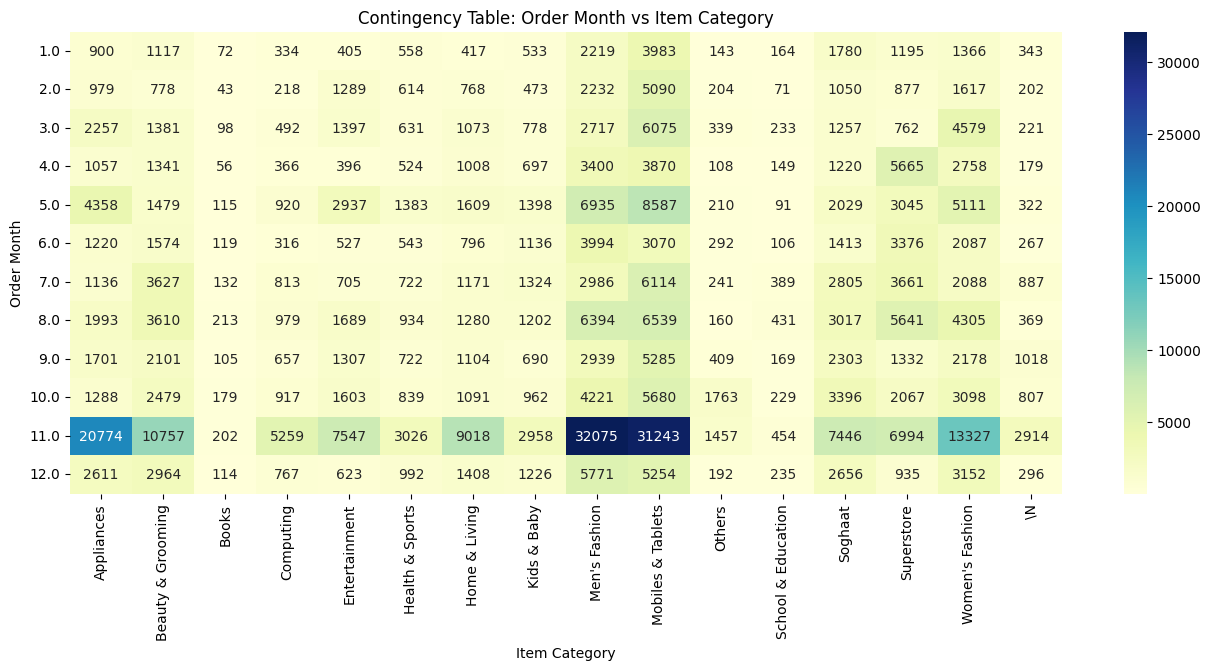

In [49]:
# Create a contingency table
contingency_table = pd.crosstab(df['Month'], df['category_name_1'])

# Plot the heatmap
plt.figure(figsize=(16, 6))
sns.heatmap(contingency_table, annot=True, cmap="YlGnBu", fmt="d")
plt.title('Contingency Table: Order Month vs Item Category')
plt.xlabel('Item Category')
plt.ylabel('Order Month')
plt.yticks(rotation=0)
plt.show()

# **3.6 Let's plot a contingency table between payment method and Order status.**

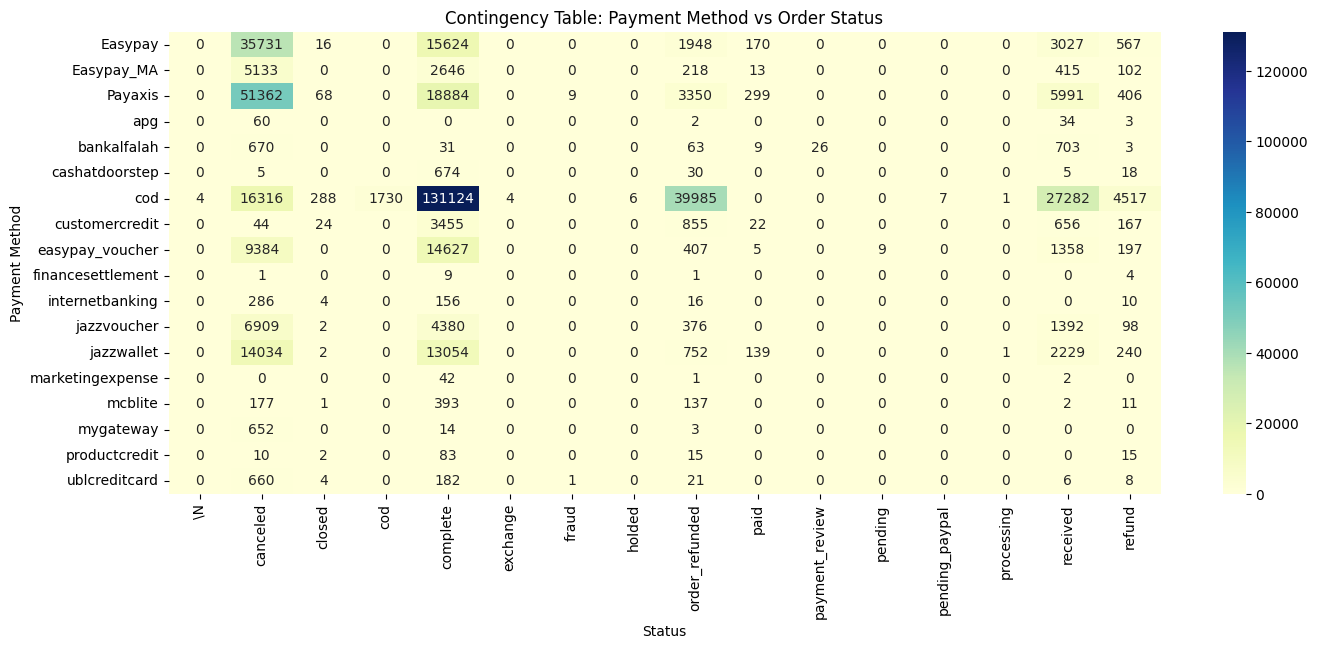

In [50]:
# Create a contingency table
contingency_table = pd.crosstab(df['payment_method'], df['status'])

# Plot the heatmap
plt.figure(figsize=(16, 6))
sns.heatmap(contingency_table, annot=True, cmap="YlGnBu", fmt="d")
plt.title('Contingency Table: Payment Method vs Order Status')
plt.xlabel('Status')
plt.ylabel('Payment Method')
plt.yticks(rotation=0)
plt.show()

# **3.7 Let's visualize that which payment method is used most to pay for orders ?**

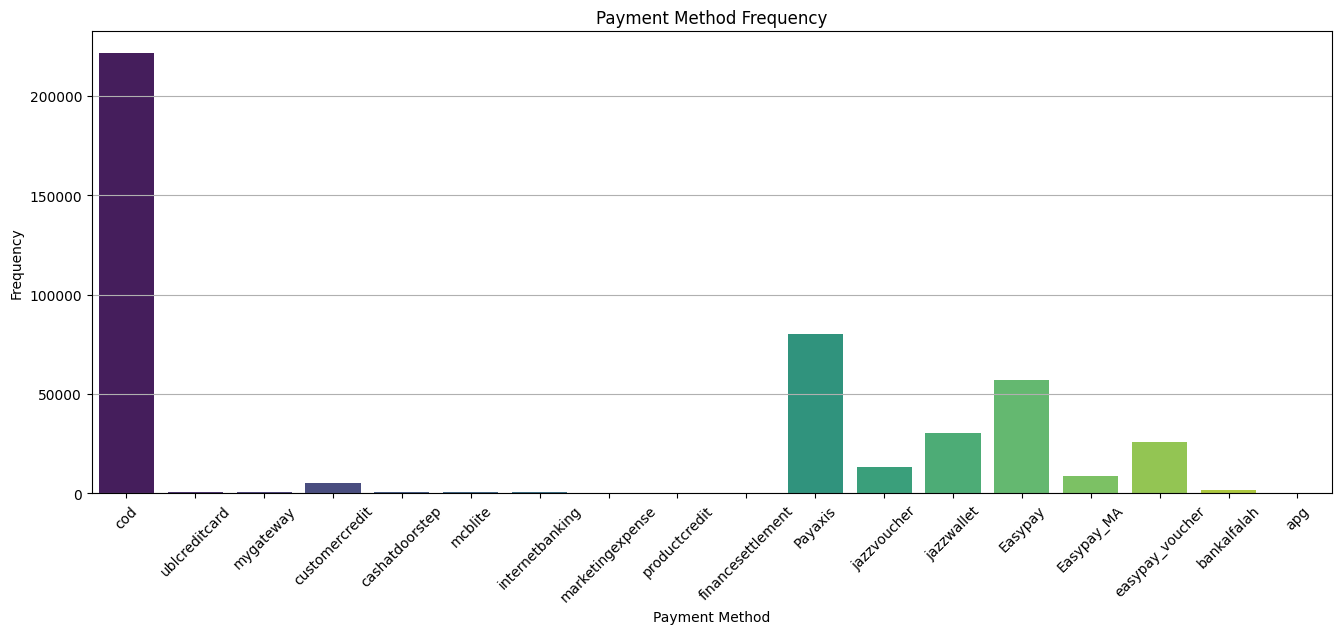

In [40]:
plt.figure(figsize=(16, 6))
sns.countplot(data=df, x='payment_method', palette='viridis')
plt.title('Payment Method Frequency')
plt.xlabel('Payment Method')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# **3.8 Scatter plot of Price vs Quantity Ordered by Category**

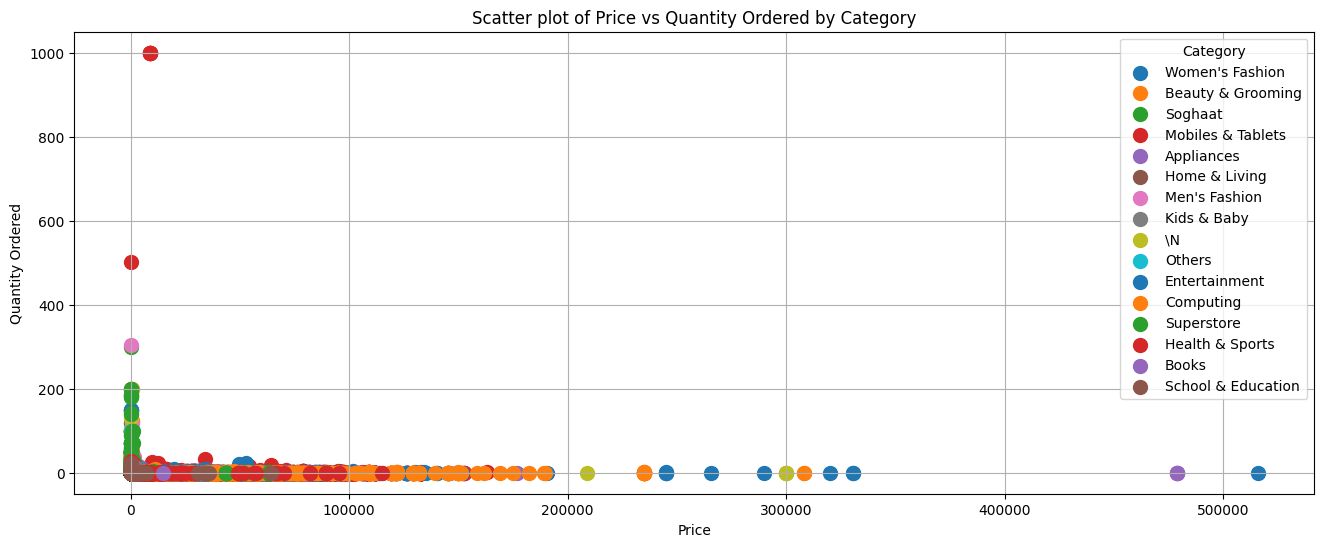

In [41]:
plt.figure(figsize= ( 16 , 6))
categories = df['category_name_1'].unique()
for category in categories:
    subset = df[df['category_name_1'] == category]
    plt.scatter(subset['price'], subset['qty_ordered'], label=category, s=100)  # Added size for better visibility

plt.xlabel('Price')
plt.ylabel('Quantity Ordered')
plt.title('Scatter plot of Price vs Quantity Ordered by Category')
plt.legend(title='Category')
plt.grid(True)  # Added grid for better readability
plt.show()

# **3.9 Plotting the order Frequency**

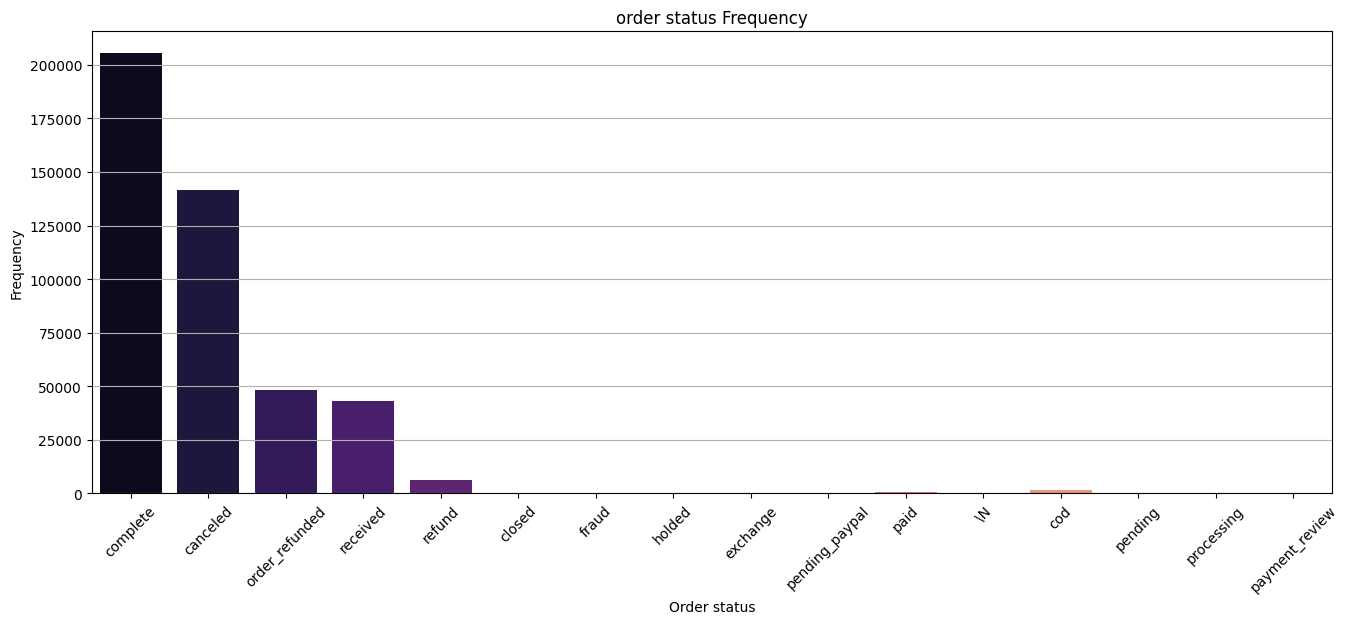

In [42]:
# Plotting Order Status Frequency with Seaborn
plt.figure(figsize=(16, 6))
sns.countplot(data=df, x='status', palette='magma')
plt.title('order status Frequency')
plt.xlabel('Order status')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# **3.10 What are the top 10 selling items ?**

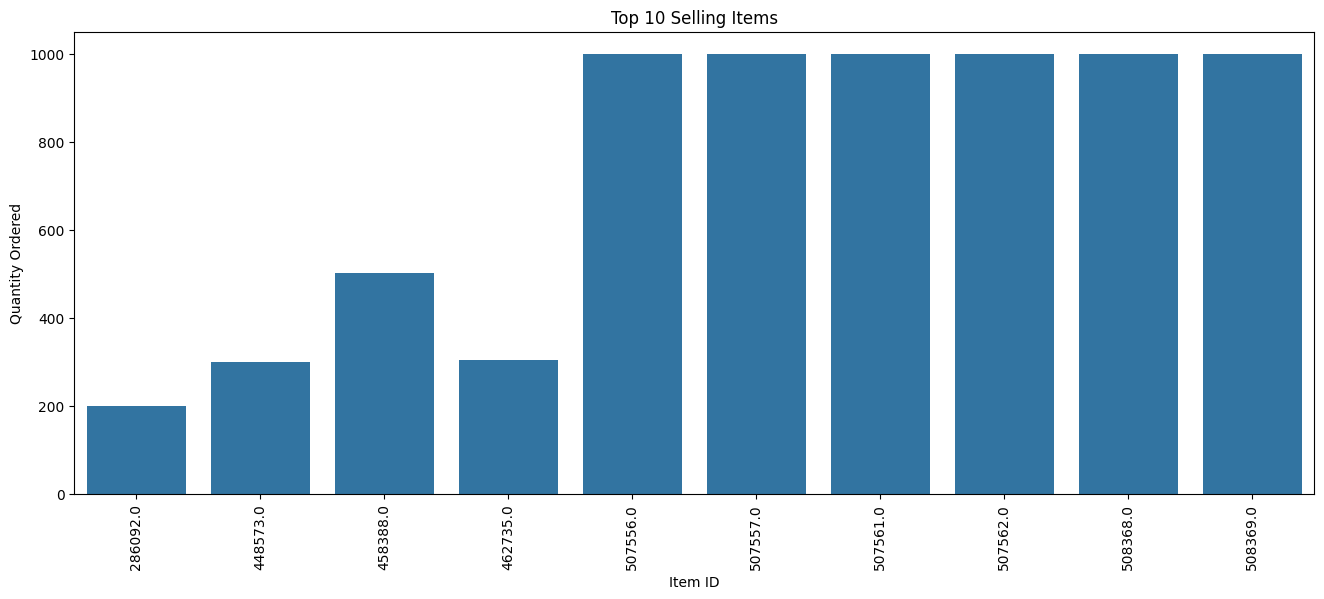

In [79]:
plt.figure( figsize= ( 16 , 6))
top_items = df.groupby('item_id')['qty_ordered'].sum().nlargest(10).reset_index()
sns.barplot(x='item_id', y='qty_ordered', data=top_items)
plt.title('Top 10 Selling Items')
plt.xlabel('Item ID')
plt.ylabel('Quantity Ordered')
plt.xticks(rotation=90)
plt.show()

# **3.11 Let's visualize the customer acquisituion trend**

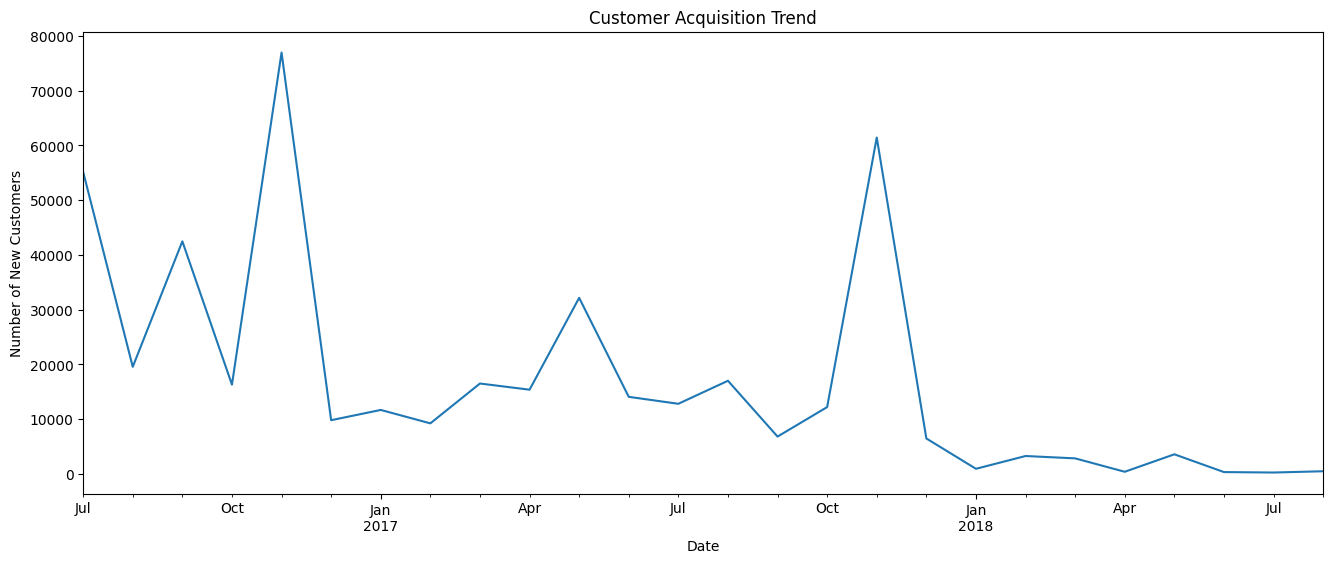

In [51]:
plt.figure(figsize= ( 16 , 6))
df['Customer Since'] = pd.to_datetime(df['Customer Since'])
customer_acquisition = df['Customer Since'].value_counts().sort_index()
customer_acquisition.plot()
plt.title('Customer Acquisition Trend')
plt.xlabel('Date')
plt.ylabel('Number of New Customers')
plt.show()

# **3.12 Let's see if there is any impact of discount on sales ?**

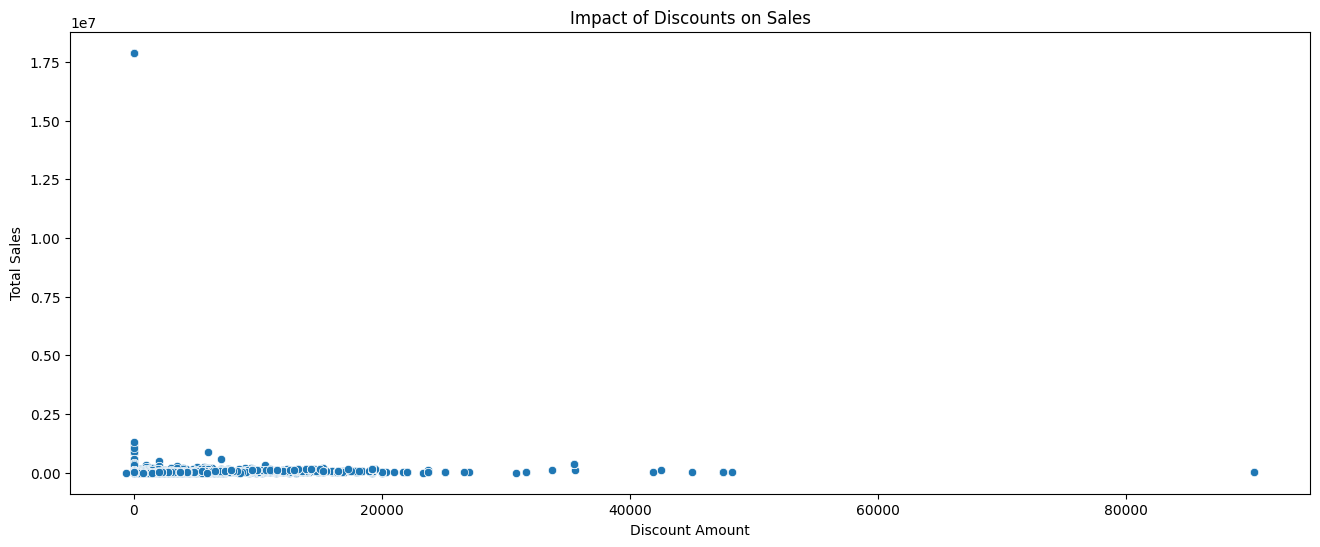

In [82]:
plt.figure(figsize= ( 16 , 6))


sns.scatterplot(x='discount_amount', y='grand_total', data=df)
plt.title('Impact of Discounts on Sales')
plt.xlabel('Discount Amount')
plt.ylabel('Total Sales')
plt.show()

# **3.13 Plot of revenue with respect to catergory**

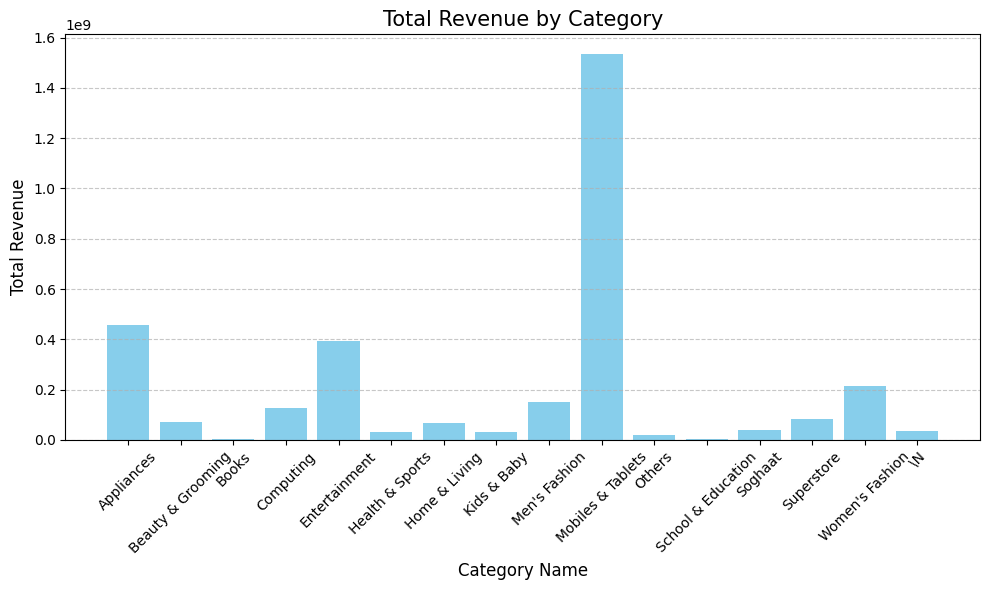

In [66]:
revenue_by_category = df.groupby('category_name_1')['grand_total'].sum().reset_index()

# Plot a bar graph
plt.figure(figsize=(16, 6))
plt.bar(revenue_by_category['category_name_1'], revenue_by_category['grand_total'], color='skyblue')
plt.xlabel('Category Name', fontsize=12)
plt.ylabel('Total Revenue in Millons', fontsize=12)
plt.title('Total Revenue by Category', fontsize=15)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)


plt.tight_layout()
plt.show()

# **3.14 Plot between Total customers and Repeat customers**

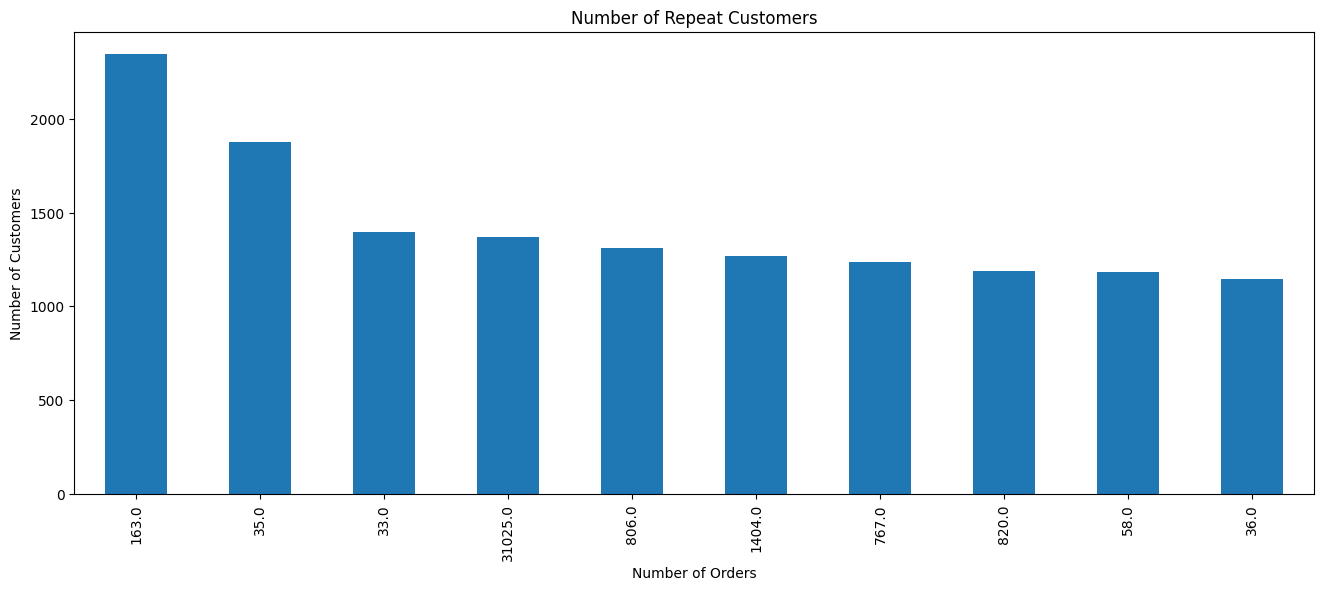

In [54]:
plt.figure(figsize= ( 16 , 6))

repeat_customers = df['Customer ID'].value_counts().sort_values(ascending= False).head(10)
repeat_customers.plot.bar()
plt.title('Number of Repeat Customers')
plt.xlabel('Number of Orders')
plt.ylabel('Number of Customers')
plt.show()

# **3.15 Plot of total Sales vs Sales by SKU**

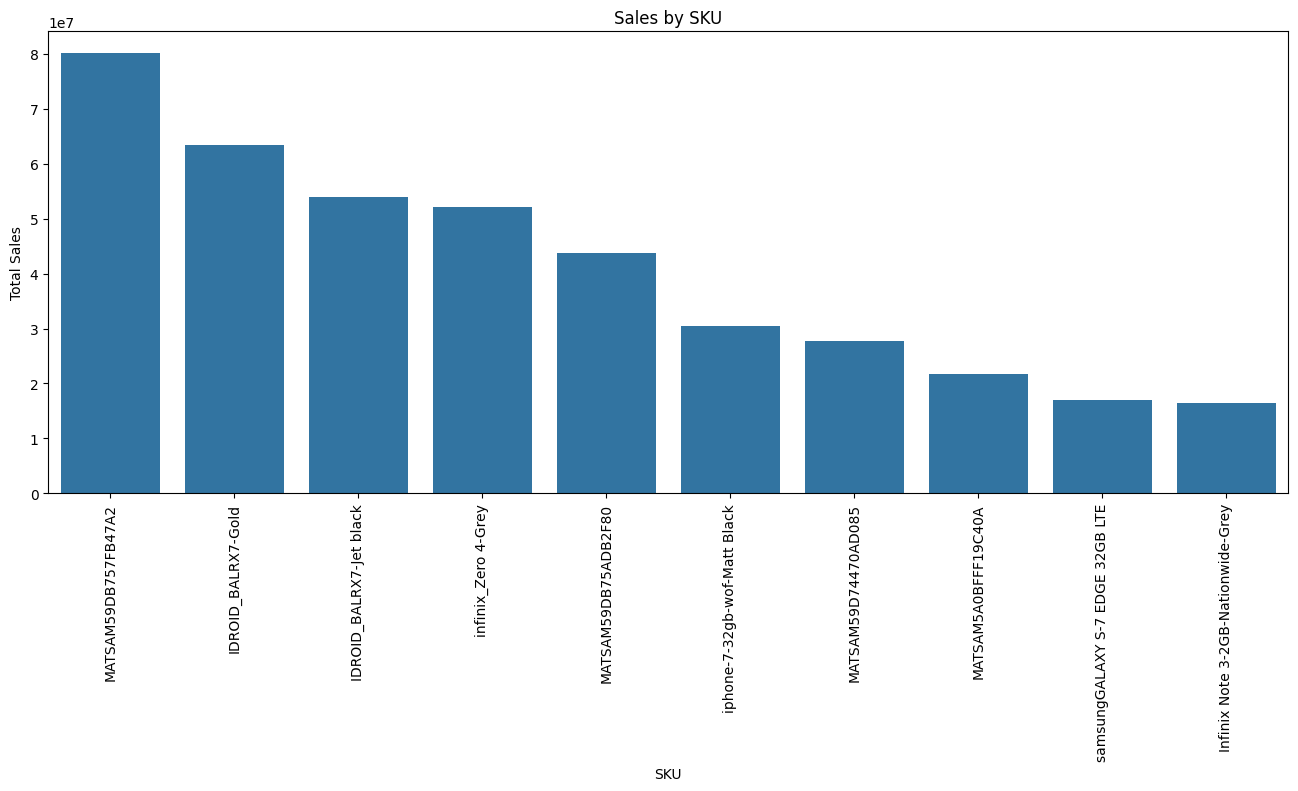

In [56]:
plt.figure( figsize=( 16, 6))
sales_by_sku = df.groupby('sku')['grand_total'].sum().nlargest(10).reset_index()
sns.barplot(x='sku', y='grand_total', data=sales_by_sku)
plt.title('Sales by SKU')
plt.xlabel('SKU')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)
plt.show()

# **3.16 Visualizing seasonal sales pattern in different fiscal years**

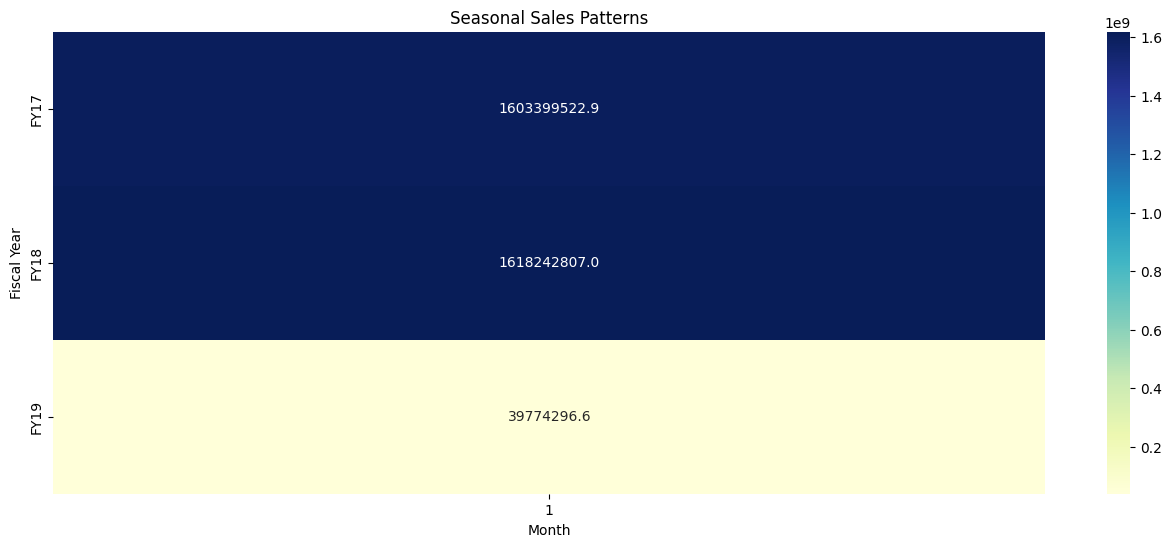

In [61]:
plt.figure( figsize=( 16, 6))	
seasonal_sales = df.pivot_table(values='grand_total', index='FY', columns=df['Month'].dt.month, aggfunc='sum')
sns.heatmap(seasonal_sales, cmap='YlGnBu', annot=True, fmt='.1f')
plt.title('Seasonal Sales Patterns')
plt.xlabel('Month')
plt.ylabel('Fiscal Year')
plt.show()

---
# **4.0 DATA INSIGHTS**
---

# **4.1 Which category lies on the top with respect to sales ?**

In [67]:
top_category = df.groupby('category_name_1')['grand_total'].sum().idxmax()
print(f"Top Category by Sales: {top_category}")

Top Category by Sales: Mobiles & Tablets


# **4.2 What is the total revenue generated ?**

In [68]:
total_revenue = df['grand_total'].sum()
print(f"Total Revenue: ${total_revenue:.2f}")

Total Revenue: $3261416626.49


# **4.3 What is the average order value ?**

In [69]:
avg_order_value = df['grand_total'].mean()
print(f"Average Order Value: ${avg_order_value:.2f}")

Average Order Value: $7290.92


# **4.4 What is the total quantity ordered or sold of all products from inventory?**

In [70]:
total_quantity_ordered = df['qty_ordered'].sum()
print(f"Total Quantity Ordered: {total_quantity_ordered}")

Total Quantity Ordered: 540285.0


# **4.6 Which single order has the most value ?**

In [71]:
highest_order_value = df['grand_total'].max()
print(f"Highest Single Order Value: ${highest_order_value:.2f}")


Highest Single Order Value: $17888000.00


# **4.7 Who is the most frequent customer ?**

In [72]:
most_frequent_customer = df['Customer ID'].value_counts().idxmax()
print(f"Most Frequent Customer ID: {most_frequent_customer}")


Most Frequent Customer ID: 163.0


# **4.8 What is the average discount provided ?**

In [73]:
avg_discount = df['discount_amount'].mean()
print(f"Average Discount Amount: ${avg_discount:.2f}")

Average Discount Amount: $472.51


# **4.9 How much are the average items per order ?**

In [74]:
avg_items_per_order = df['qty_ordered'].mean()
print(f"Average Items per Order: {avg_items_per_order:.2f}")

Average Items per Order: 1.21


# **4.10 How much revenue is generated from returning customers ?**

In [76]:
returning_customers_revenue = df[df['Customer ID'].duplicated(keep=False)]['grand_total'].sum()
print(f"Revenue from Returning Customers: ${returning_customers_revenue:.2f}")

Revenue from Returning Customers: $3007450661.39


# **4.11 What is the total discounts give to the customers ?**

In [77]:
total_discounts_given = df['discount_amount'].sum()
print(f"Total Discounts Given: ${total_discounts_given:.2f}")

Total Discounts Given: $211366541.27


## *WHEN WAS THE FIRST ORDER PLACED ?* The ***PIONEER***

In [78]:
earliest_order_date = df['created_at'].min()
print(f"Earliest Order Date: {earliest_order_date}")

Earliest Order Date: 1/1/2017


---
# **THE END**
---